In [1]:
%pylab inline
%config InlineBackend.figure_format='retina'

Populating the interactive namespace from numpy and matplotlib


In [529]:
pynq_ip = '10.102.20.105'

In [532]:
pynq = socket.create_connection((pynq_ip, '2222'), timeout=1)
pynq.setblocking(1)
pynq.setsockopt(socket.IPPROTO_TCP, socket.TCP_NODELAY, 1)

In [533]:
def reward(time):
    pynq.send('reward, {}'.format(time))

In [534]:
reward(1)

In [537]:
scv = []
last_t = 0
while True:
    _scv = np.fromfile('./scv.bin')
    try:
        t  = _scv[0]
        fr = _scv[1:]/200e-3
        if last_t != t:
#             print t, _scv[1:]
        ##########################################################
            if fr[4]>20:
                print('firing rate of group 4 pass threshold')
        ##########################################################
            scv.append(_scv)
        last_t = t
    except:
        pass
    finally:
        np.array(scv).tofile('./spike_count_vector.bin')

KeyboardInterrupt: 

In [538]:
x = np.fromfile('./spike_count_vector.bin').reshape(-1,31)

In [539]:
frame = x[:, 0]
scv = x[:, 1:]/200e-3

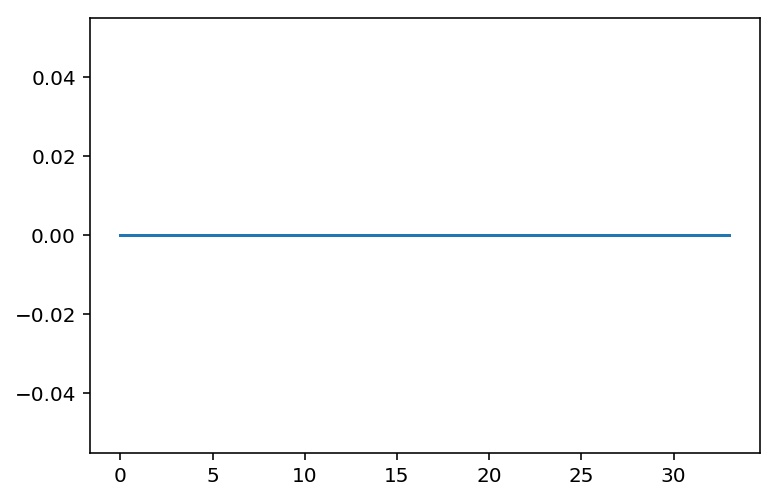

In [540]:
plot(scv[:300, 4])